# Eulers metode
__Creative Commons BY-SA : bitjungle (Rune Mathisen) og fuzzbin (Tom Jarle Christiansen)__

<hr/>
<img alt="Opphavsmann: Mestigoit Lisens: Creative Commons BY-SA 3.0 Unported" title="Opphavsmann: Stefan Walkowski Lisens: Creative Commons BY-SA 4.0 Unported" style="width: 200px; float: right; margin-left: 30px;" src="img/Euler.png">

__[Eulers metode](https://en.wikipedia.org/wiki/Euler_method) er en algoritme for å finne numeriske løsninger til [ordinære differensialligninger](https://en.wikipedia.org/wiki/Ordinary_differential_equation). I naturvitenskapen beskriver slike likninger som oftest en størrelse og endringen av denne størrelsen over tid. Eksempler på dette kan være populasjonsvekst i en bakteriekultur eller fartsendring til et objekt som faller i et gravitsjonsfelt. Eulers metode brukes for å finne [numeriske løsninger](https://no.wikipedia.org/wiki/Numerisk_analyse)  på slike problemer når du kjenner en initialverdi.__

> Denne siden dekker helt eller delvis kompetansemålene: [????](????)

<img alt="Opphavsmann: Mestigoit Lisens: Creative Commons BY-SA 3.0 Unported" title="Opphavsmann: Mestigoit Lisens: Creative Commons BY-SA 3.0 Unported" style="width: 200px; float: right; margin-left: 30px;" src="img/Mycobacterium_smegmatis.jpg">

Som et generelt utgangspunkt for Eulers metode antar vi at vi har en ordinær differensiallikning på formen:

$$ y' = f(x,y) $$

I dette eksemplet tenker vi oss at vi har en funksjon $y$ (som vi ikke vet hvordan ser ut) og differensiallikningen $ y' = y $ (som beskriver hvordan systemet endrer seg). Vi har i tillegg initialbetingelsen $ y(0) = 1 $. Dette kan for eksempel være en beskrivelse av eksponentiell vekst i en bakteriekultur, hvor vi vet antall bakterier vi starter med ved tidspunktet $ t = 0 $.

Vi ønsker nå å bruke Eulers metode for å finne denne verdien numerisk. For å få til dette må vi starte et sted som vi vet noe om. I dette tilfellet bruker vi initialbetingelsen $ y(0) = 1 $, og starter derifra. Vi må også bestemme oss for en $ \Delta t $ som er hvor store "skritt" vi skal ta mellom hver beregning.

<div style="border: solid thin; font-weight: bold; margin: 1em; padding: 1em;">
Med Eulers metode kan vi simulere hvordan et system oppfører seg over tid, selv om vi ikke har en matematisk funksjon som beskriver systemet. Grunnprinsippet er at hver nye verdi beregnes med utgangspunkt i den forrige.</div>

Vi tar utgangspunkt i $ y' = y $, og skriver $y'$ som $\Delta y / \Delta t$:

$$ \frac{\Delta y}{\Delta t} = y_n $$

Her er $\Delta y$ forskjellen mellom nåværende og neste y-verdi, når vi har beveget oss med tidsskrittet $\Delta t$.  Vi kan skrive det som:

$$ \frac{y_{n+1} - y_n}{\Delta t} = y_n $$

Vi gjør om slik at vi får et uttrykk for neste y-verdi:

$$ y_{n+1} = y_n + \Delta t \cdot y_n $$

Vi skal nå regne ut $y'(0)$ med utgangspunkt i initialbetingelsen. Vi vet at $y'= y$ og $y(0) = 1$. Dette betyr at $y'(0)=1$.

Neste skritt er å øke $t$ med $\Delta t$ og regne ut en gang til. Vi lar $\Delta t = 1$

$$y(1) = y(0) + \Delta t \cdot y(0) = 1 + 1 \cdot 1 = 2$$

Vi kan nå bruke dette resultatet til å regne ut neste verdi:
$$y(2) = y(1) + \Delta t \cdot y(1) = 2 + 1 \cdot 2 = 4$$

Slik kan vi fortsette helt til vi har regnet ut $y(5)$ som i tabellen under.

|$t$ |$y$ |$y'$|
|:--:|:--:|:--:|
|0|1|1|
|1|2|2|
|2|4|4|
|3|8|8|
|4|16|16|
|5|32|32|

<img alt="Opphavsmann: bitjungle Lisens: Creative Commons CC0" title="Opphavsmann: bitjungle Lisens: Creative Commons CC0" style="margin-left: 30px; width: 75%;" src="img/euler_illustrasjon_2.png">

I dette eksemplet har vi ikke sagt noe om hvordan funksjonen $y$ ser ut. Det er en eksponentialfunksjon $e^x$. Siden vi her kjenner den virkelige funksjonen, kan vi sammenlikne våre numeriske tilnærminger med de virkelige verdiene. Startverdien $y_0$ er en konstant som multipliseres med eksponentialfunksjonen.

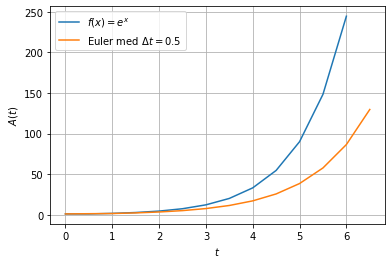

In [1]:
# Importerer nødvendige biblioteker
import matplotlib.pyplot as plt
import numpy as np

# Initialbetingelser
y0 = 1
delta_t = 0.5

# For hvilken t skal beregningene stoppe?
max_t = 6

# Eksakt løsning (Blå linje)
def A(x):
    return np.exp(x)

# Eulers metode for denne spesifikke problemstillingen
def neste_y():
    return ye[-1] + ye[-1] * delta_t

# Klargjør lister for eksakt løsninig
t = [0]
y = [y0]

# Klargjør lister for Eulerberegninger
te = [0]
ye = [y0]

# Løkke som fyller listene med data
for x in np.arange(0, max_t, delta_t):
    # Eksakte verdier
    t.append(t[-1] + delta_t)
    y.append(A(x))
    #Euler
    te.append(t[-1] + delta_t)
    ye.append(neste_y())

# Utskrift av data
plt.grid() # Lager rutenett
plt.xlabel('$t$') # Merker x-aksen
plt.ylabel('$A(t)$') # Merker y-aksen
plt.plot(t, y, label='$f(x)=e^x$')
plt.plot(te, ye, label='Euler med $\Delta t={}$'.format(delta_t))
plt.legend()
plt.show()

## Oppsummering

Gitt at vi har en førsteordens lineær differensiallikning:

$$ \frac{dy}{dx} = f(x,y) $$

Vi har også gitt initialbetingelsene: 

$$ y(x_0) = y_0 $$

Vi bestemmer oss for en "skrittlengde" $\Delta x$ som er avstanden mellom hvert nye estimat vi beregner med Eulers metode. En liten $\Delta x$ gir mer presise estimater, men "koster mer" i form av mange beregninger som må utføres. Med Eulers metode kan vi nå finne estimater for neste x og y:

$$ x_{n+1} = x_n + \Delta x $$
$$ y_{n+1} = y_n + \Delta x \cdot f(x_n,y_n) $$

## Oppgaver

1. Ta utgangspunkt i eksempelet over. Endre på step-verdien $\Delta x$, gjør den gradvis mindre og mindre (la den nærme seg 0). Hva observerer du?
2. Kan du løse differensiallikningen $\frac{dy}{dx}=x+2y$ numerisk når $y(0)=0$? Bruk $\Delta x = 0.1$. Finn eksakt løsning med f.eks [Wolfram Alpha](http://www.wolframalpha.com), og sammenlign med funksjonen du kommer frem til.
3. En realistisk [modell for luftmotstand](https://snl.no/luftmotstand) kan være $L = k \cdot v^2$. Lag et program som beregner $v(t)$ ved hjelp av Eulers metode når du vet at $ \sum F = G - L $. (Hint: Husk at $F = m \cdot a = m \cdot v'$)
4. Lag et program som viser hvordan en bakteriekultur vokser når vi starter med $20 $ bakterier ved tiden $t=0$ s. Populasjonen dobles hver time. Hva er populasjonen etter 7 timer, og når vil populasjonen nå $1 \cdot 10^6$ bakterier.
5. Lag et program som bruker Eulers metode på en annen modell som du velger selv.